![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [69]:
# Start your code here!
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
# importing data
men_results = pd.read_csv("men_results.csv", parse_dates=["date"])
women_results = pd.read_csv("women_results.csv", parse_dates=["date"])

print(men_results.head())
print(women_results.head())

   Unnamed: 0       date home_team away_team  home_score  away_score tournament
0           0 1872-11-30  Scotland   England           0           0   Friendly
1           1 1873-03-08   England  Scotland           4           2   Friendly
2           2 1874-03-07  Scotland   England           2           1   Friendly
3           3 1875-03-06   England  Scotland           2           2   Friendly
4           4 1876-03-04  Scotland   England           3           0   Friendly
   Unnamed: 0       date home_team  ... home_score  away_score        tournament
0           0 1969-11-01     Italy  ...          1           0              Euro
1           1 1969-11-01   Denmark  ...          4           3              Euro
2           2 1969-11-02   England  ...          2           0              Euro
3           3 1969-11-02     Italy  ...          3           1              Euro
4           4 1975-08-25  Thailand  ...          3           2  AFC Championship

[5 rows x 7 columns]


In [71]:
# exploring the dataframes
print(men_results.info())
print(women_results.info())

print(men_results.value_counts("tournament"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  44353 non-null  int64         
 1   date        44353 non-null  datetime64[ns]
 2   home_team   44353 non-null  object        
 3   away_team   44353 non-null  object        
 4   home_score  44353 non-null  int64         
 5   away_score  44353 non-null  int64         
 6   tournament  44353 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 2.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  4884 non-null   int64         
 1   date        4884 non-null   datetime64[ns]
 2   home_team   4884 non-null   object        
 3   away_team   4884 non-null   object 

In [72]:
# creating goals column (both away and home scores on a match)
men_results["goals"] = men_results["home_score"] + men_results["away_score"]
women_results["goals"] = women_results["home_score"] + women_results["away_score"]

In [73]:
# filtering for FIFA World Cup matches
wc_men = men_results[(men_results["tournament"] == "FIFA World Cup") & (men_results["date"] > "2002-01-01")]
wc_women = women_results[(women_results["tournament"] == "FIFA World Cup") & (women_results["date"] > "2002-01-01")]

wc_women.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1600 to 4469
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  200 non-null    int64         
 1   date        200 non-null    datetime64[ns]
 2   home_team   200 non-null    object        
 3   away_team   200 non-null    object        
 4   home_score  200 non-null    int64         
 5   away_score  200 non-null    int64         
 6   tournament  200 non-null    object        
 7   goals       200 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 14.1+ KB


In [74]:
# exploring descriptives
print(wc_men["goals"].describe())
print(wc_women["goals"].describe())

count    384.000000
mean       2.513021
std        1.652544
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        8.000000
Name: goals, dtype: float64
count    200.000000
mean       2.980000
std        2.022387
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       13.000000
Name: goals, dtype: float64


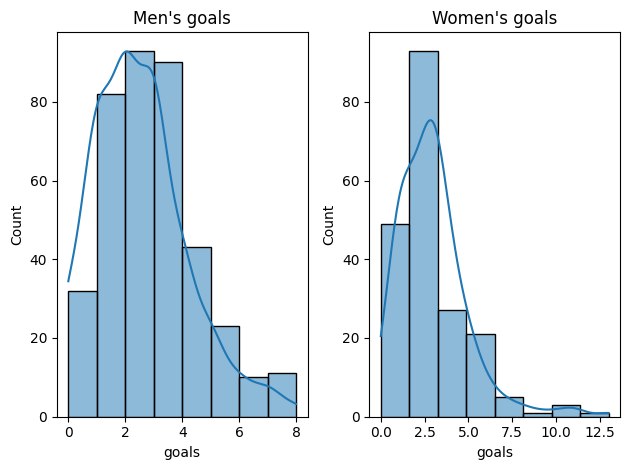

In [75]:
# determining data distributions by visualizing them
plt.subplot(1, 2, 1)
sns.histplot(x="goals", data=wc_men, kde=True, bins=8)
plt.title("Men's goals")

plt.subplot(1, 2, 2)
sns.histplot(x="goals", data=wc_women, kde=True, bins=8)
plt.title("Women's goals")

plt.tight_layout()

plt.show()

The plots indicate a non-normal distribution

In [76]:
# testing for normal distribution
from scipy.stats import shapiro

print(shapiro(wc_men["goals"]))
print(shapiro(wc_women["goals"]))

ShapiroResult(statistic=0.9266489744186401, pvalue=8.894154401688226e-13)
ShapiroResult(statistic=0.8491013050079346, pvalue=3.8905201759850683e-13)


Since the Shapiro-Wilk test results are significant, we can reject the null hypothesis and say that we have sufficient evidence that the sample data does not come from a normal distribution. We can conclude that a non-parametric test is required.

Hypotheses:
-     H0: There is no significant difference between men's and women's goals on Fifa World Cup tournaments.
-     H1: There is a significant difference between the number of scored goals on men's and women's Fifa World Cup tournaments

We determin the alpha level as 10% (0.01)

In [77]:
# perform a Mann-Whitney U-test
from scipy.stats import mannwhitneyu

print(mannwhitneyu(wc_women["goals"], wc_men["goals"], alternative="greater"))

MannwhitneyuResult(statistic=43273.0, pvalue=0.005106609825443641)


From our results, compared to the predefined alpha level (0.01), we can conclude that there is a significant difference between the number of men's and women's goals on Fifa World Cup tournaments. We can reject the null hypothesis.

In [78]:
# storing the results
p_val = mannwhitneyu(wc_women["goals"], wc_men["goals"], alternative="greater").pvalue
result_dict = {"p_val": p_val, "result": "reject"}
print(p_val)

0.005106609825443641
